# Heart Disease Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Cleaning

In [3]:
data.isnull().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp             0
cholestoral            0
fasting_blood_sugar    0
restecg                0
max_hr                 0
exang                  0
oldpeak                0
slope                  0
num_major_vessels      0
thal                   0
target                 0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   sex                  303 non-null    int64  
 2   chest_pain_type      303 non-null    int64  
 3   resting_bp           303 non-null    int64  
 4   cholestoral          303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   restecg              303 non-null    int64  
 7   max_hr               303 non-null    int64  
 8   exang                303 non-null    int64  
 9   oldpeak              303 non-null    float64
 10  slope                303 non-null    int64  
 11  num_major_vessels    303 non-null    int64  
 12  thal                 303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
X = data.drop('target', axis=1)
y = data['target']

## Model Training

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 42)

In [7]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [8]:
heart_model = RandomForestClassifier()

In [9]:
heart_model.fit(X_train,y_train)

RandomForestClassifier()

In [10]:
heart_model.score(X_test, y_test)

0.8360655737704918

In [11]:
cross_val_score(heart_model,X,y,cv=5,scoring=None)

array([0.83606557, 0.90163934, 0.78688525, 0.81666667, 0.73333333])

In [12]:
heart_model.score(X_test,y_test),np.mean(cross_val_score(heart_model,X,y,cv=5,scoring=None))

(0.8360655737704918, np.float64(0.8315300546448088))

                Feature  Importance
11    num_major_vessels    0.143401
7                max_hr    0.118834
9               oldpeak    0.115173
12                 thal    0.109548
2       chest_pain_type    0.097288
0                   age    0.087805
3            resting_bp    0.078761
4           cholestoral    0.078311
8                 exang    0.073273
10                slope    0.040147
1                   sex    0.029735
6               restecg    0.017159
5   fasting_blood_sugar    0.010564


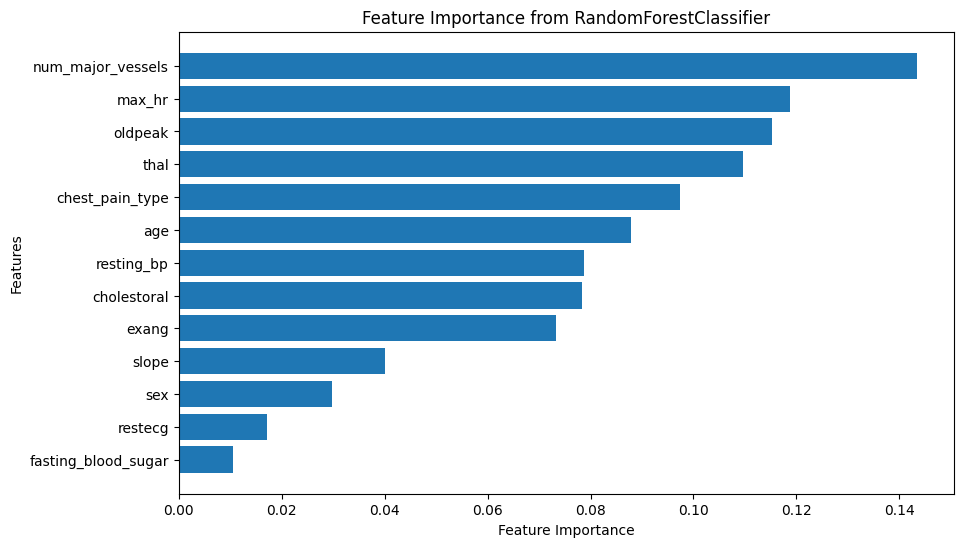

In [13]:
# Feature Importance
feature_importance = heart_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from RandomForestClassifier')
plt.gca().invert_yaxis()
plt.show()


## Prediction

In [14]:
y_pred = heart_model.predict(X_test)

In [15]:
y_pred[:5]

array([0, 1, 0, 0, 1])

## Area under curve (AUC)
## Reciever Operating charac (ROC)

In [16]:
from sklearn.metrics import roc_curve
y_proba = heart_model.predict_proba(X_test)

In [17]:
y_proba[:5], y_test[:5]

(array([[0.89, 0.11],
        [0.49, 0.51],
        [0.52, 0.48],
        [0.87, 0.13],
        [0.22, 0.78]]),
 179    0
 228    0
 111    1
 246    0
 60     1
 Name: target, dtype: int64)

In [18]:
#Truth is y_pred values, model value is y_prob value

#case:1   Truth = 0, Model= 0  (0.07) ----->  True Negative
#case:2   Truth = 0, Model= 1  (0.61) ----->  False positive
#case:3   Truth = 1, Model= 1  (0.51) ----->  True Positive
#case:4   Truth = 0, Model= 0  (0.1)  ----->  True negative
#other case: Truth = 1 , model= 0 -----> false negative

In [19]:
y_prob_positive = y_proba[:,1]

In [20]:
#calculate fpr, tpr, threshold

fpr, tpr, threshold = roc_curve(y_test,y_prob_positive)

In [21]:
fpr, tpr

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.03448276, 0.03448276, 0.03448276, 0.06896552, 0.06896552,
        0.13793103, 0.13793103, 0.13793103, 0.17241379, 0.17241379,
        0.20689655, 0.20689655, 0.24137931, 0.24137931, 0.31034483,
        0.37931034, 0.44827586, 0.65517241, 0.72413793, 0.72413793,
        0.82758621, 0.86206897, 0.96551724, 1.        ]),
 array([0.     , 0.03125, 0.0625 , 0.125  , 0.1875 , 0.25   , 0.34375,
        0.4375 , 0.5    , 0.53125, 0.5625 , 0.59375, 0.65625, 0.71875,
        0.75   , 0.75   , 0.8125 , 0.84375, 0.84375, 0.90625, 0.90625,
        0.9375 , 0.9375 , 0.96875, 0.96875, 0.96875, 0.96875, 0.96875,
        0.96875, 1.     , 1.     , 1.     , 1.     , 1.     ]))

In [22]:
#create a function for plotting using matplotlib
import matplotlib.pyplot as plt

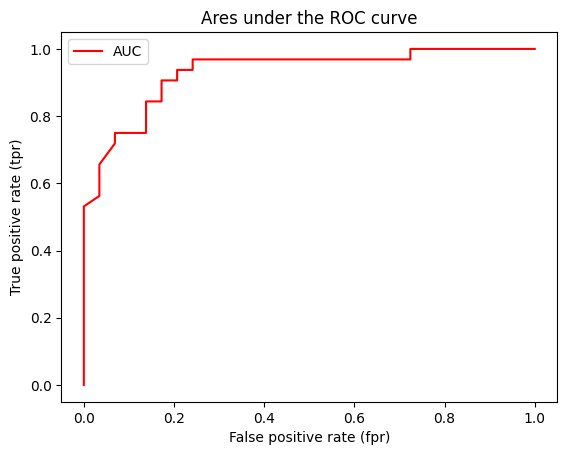

In [23]:

def plot_roc(fpr,tpr):
    #Plot ROC curve
    plt.plot(fpr,tpr, color="red", label= "AUC")
    #customize the plot
    plt.title("Ares under the ROC curve")
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.legend()
    plt.show()
        
plot_roc(fpr,tpr)

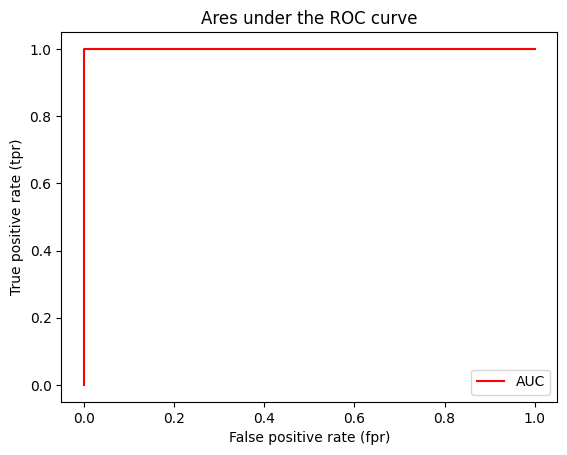

In [24]:
#calculate fpr, tpr, threshold

fpr, tpr, threshold = roc_curve(y_test,y_test)
plot_roc(fpr,tpr)

In [25]:
#Area under curve score is 93.8
roc_auc_score(y_test,y_prob_positive)

np.float64(0.9304956896551724)

### Confusion matrix

In [26]:
#Confusion matrix tells where your model is confused or has lost its mind
###Case-1 YES : True Positive: Truth = 1 and Model = 1: Model got its right
###Case-2 Opps : False Positive: Truth = 0 and Model = 1: Model lost its mind
###Case-3 Yes : True Negative: Truth = 0 and Model = 0: Model got its right
###Case-4 Opps : False Negative: Truth = 1 and Model = 0: Model lost its mind


In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
y_pred = heart_model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[24,  5],
       [ 5, 27]])

In [29]:
#These are the values where matrics are confuse
#case-1 values are 26 ---- gives yes
#case-2 values are 4 ---- confuse case
#case-3 values are 25 --- gives yes
#case-4 values are 6 ---- confuse case

In [30]:
len(y_test)  # 26+4+25+6= 61

61

In [31]:
# To visualize its better
pd.crosstab(y_test,
            y_pred,
            rownames=['Truth'],
            colnames=["Predicted"])

Predicted,0,1
Truth,,
0,24,5
1,5,27


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt 

In [33]:
conf_mat = confusion_matrix(y_test,y_pred)

def plot_confmatrix(conf_mat):
    '''
    This Fnction Plots confusion matrix
    '''
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot = True,
                     cbar = False)
    plt.xlabel("Truth")
    plt.ylabel("Predicted")


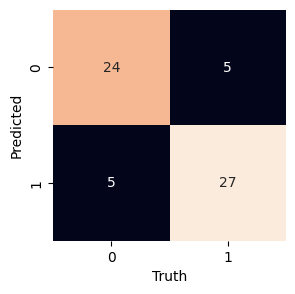

In [34]:
plot_confmatrix(conf_mat) 

## Classification Report

In [35]:
# Recall = (TP/TP+FN)
# Precision = (TP/TP+FP)
#F1 = Combination of Recall and Precision

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [37]:
# macro avg gives (precision,recall,f1 score)
#weighted avg gives class imbalance average

## Regression model evaluation metrics

### 1 R^2
### compare your model prediction to the mean for your target

### 2 Mean absolute error (MAE)
### 3 Mean square error(MSE)

In [38]:
data.head()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [39]:
data.describe()

,age,sex,chest_pain_type,resting_bp,cholestoral,fasting_blood_sugar,restecg,max_hr,exang,oldpeak,slope,num_major_vessels,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## R^2

In [40]:
#R^2
from sklearn.ensemble import RandomForestRegressor

np.random.seed(1)
X = data.drop('target', axis=1)
y = data['target']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
heart_model = RandomForestRegressor()

heart_model.fit(X_train,y_train)
heart_model.score(X_test,y_test) #(it gives R^2 value)


0.5348289870689655

## MAE (Mean Absolute Error)

In [42]:
# Mean Absolute Error: Avg of the absolute(+ve) difference btw predicted and actual
#MAE
from sklearn.metrics import mean_absolute_error

y_pred = heart_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mae

0.23918032786885246

In [43]:
df = pd.DataFrame(data={'actual values': y_test,
                        "predicted values": y_pred})

df['differences'] = df['actual values'] - df['predicted values']
df
#how our model is
#minize this value


,actual values,predicted values,differences
179,0,0.09,-0.09
228,0,0.67,-0.67
111,1,0.48,0.52
246,0,0.12,-0.12
60,1,0.82,0.18
...,...,...,...
249,0,0.43,-0.43
104,1,1.00,0.00
300,0,0.07,-0.07
193,0,0.00,0.00


In [44]:
#MAE ---- Takes difference, Turn positive, add up, Takes the mean
#MSE ---- Takes difference, Squre them, add up, Takes the mean 

## MSE (Mean Square Error)

In [45]:
#MSE
from sklearn.metrics import mean_squared_error

y_pred = heart_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mse

0.11601147540983606

In [46]:
#Manually calculate
mse_mannual = np.square(df['differences'])
mse_mannual.mean()

np.float64(0.11601147540983606)

## Scoring Parameter in Classification

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(7)

X = data.drop('target',axis=1)
y = data['target']

clf = RandomForestClassifier()
cross_acc = cross_val_score(clf, X,y,cv=5, scoring=None)
cross_acc.mean()

np.float64(0.8051912568306012)

In [48]:
cross_acc = cross_val_score(clf, X,y,cv=5, scoring="accuracy")
cross_acc.mean()

np.float64(0.8248087431693989)

In [49]:
cross_acc = cross_val_score(clf, X,y,cv=5, scoring="precision")
cross_acc.mean()

np.float64(0.835980871331915)

In [50]:
cross_acc = cross_val_score(clf, X,y,cv=5, scoring="recall")
cross_acc.mean()

np.float64(0.8666666666666666)

In [51]:
cross_acc = cross_val_score(clf, X,y,cv=5, scoring="f1")
cross_acc.mean()

np.float64(0.8292393661569522)

## Scoring Parameter in Regression

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
np.random.seed(7)

X = data.drop('target',axis=1)
y = data['target']

Rf = RandomForestRegressor()
cross_acc = cross_val_score(clf, X,y,cv=5, scoring=None)
cross_acc.mean()

np.float64(0.8051912568306012)

In [53]:
np.random.seed(7)
cv_r2 = cross_val_score(Rf,X,y,cv=5,scoring=None)
cv_r2.mean()

np.float64(0.06574483204134371)

In [54]:
np.random.seed(7)
cv_r2 = cross_val_score(Rf,X,y,cv=5,scoring='r2')
cv_r2.mean()

np.float64(0.06574483204134371)

In [55]:
np.random.seed(7)
cv_r2 = cross_val_score(Rf,X,y,cv=5,scoring='neg_mean_absolute_error')
cv_r2.mean()

np.float64(-0.332672131147541)

In [56]:
np.random.seed(7)
cv_r2 = cross_val_score(Rf,X,y,cv=5,scoring='neg_mean_absolute_error')
cv_r2

array([-0.32032787, -0.3657377 , -0.25229508, -0.29566667, -0.42933333])

In [58]:
np.random.seed(7)
cv_r2 = cross_val_score(Rf,X,y,cv=5,scoring='neg_max_error')
cv_r2.mean()

np.float64(-0.96)

## Using different Evaluation Matrics as Sklearn Function

## classification problem

In [59]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(7)

heart_data = pd.read_csv('heart.csv')

X = heart_data.drop('target', axis=1)
y = heart_data['target']

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

y_predicted = clf.predict(X_test)

print(f'Accuracy Score:{accuracy_score(y_test,y_predicted)}')
print(f'Precision Score:{precision_score(y_test,y_predicted)}')
print(f'Recall Score:{recall_score(y_test,y_predicted)}')
print(f'f1 Score:{f1_score(y_test, y_predicted)}')


Accuracy Score:0.819672131147541
Precision Score:0.8387096774193549
Recall Score:0.8125
f1 Score:0.8253968253968254


### Model Evaluation Result

In [60]:
# Display the results in a DataFrame
df = pd.DataFrame(heart_data).T

# highlight maximum values
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Apply the style to the DataFrame
styled_df = df.style.apply(highlight_max)

# Display the styled DataFrame
styled_df

### Hyper Parametric Tuning by using Grid Search 

In [61]:
#Use GridSearchCV or RandomizedSearchCV to find the best hyperparameters for the RandomForestClassifier.
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy',
                           n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [62]:
# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

# Use the best estimator
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-Validation Score: 0.8141


In [63]:
grid_search.score(X_test, y_test)

0.8524590163934426

In [64]:
best_params = grid_search.best_params_

In [65]:
display(best_params)

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 50}

In [68]:
# Train a Decision Tree classifier with the best hyperparameters
from sklearn.tree import DecisionTreeClassifier
# Remove 'n_estimators' from best_params for DecisionTreeClassifier
dt_best_params = {k: v for k, v in best_params.items() if k != 'n_estimators'}
best_clf = DecisionTreeClassifier(random_state=42, **dt_best_params)
best_clf.fit(X_train, y_train)


DecisionTreeClassifier(min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [69]:
from sklearn.metrics import accuracy_score

# Ensure best_clf is defined
if 'best_clf' not in globals():
	# Train a Decision Tree classifier with the best hyperparameters
	from sklearn.tree import DecisionTreeClassifier
	# Remove 'n_estimators' from best_params for DecisionTreeClassifier
	dt_best_params = {k: v for k, v in best_params.items() if k != 'n_estimators'}
	best_clf = DecisionTreeClassifier(random_state=42, **dt_best_params)
	best_clf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [70]:
# Print the best hyperparameters and model accuracy
print(f"Best Hyperparameters: {best_params}")
print(f"Model Accuracy on Test Data: {accuracy:.2f}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Model Accuracy on Test Data: 0.82


#### Perform EDA

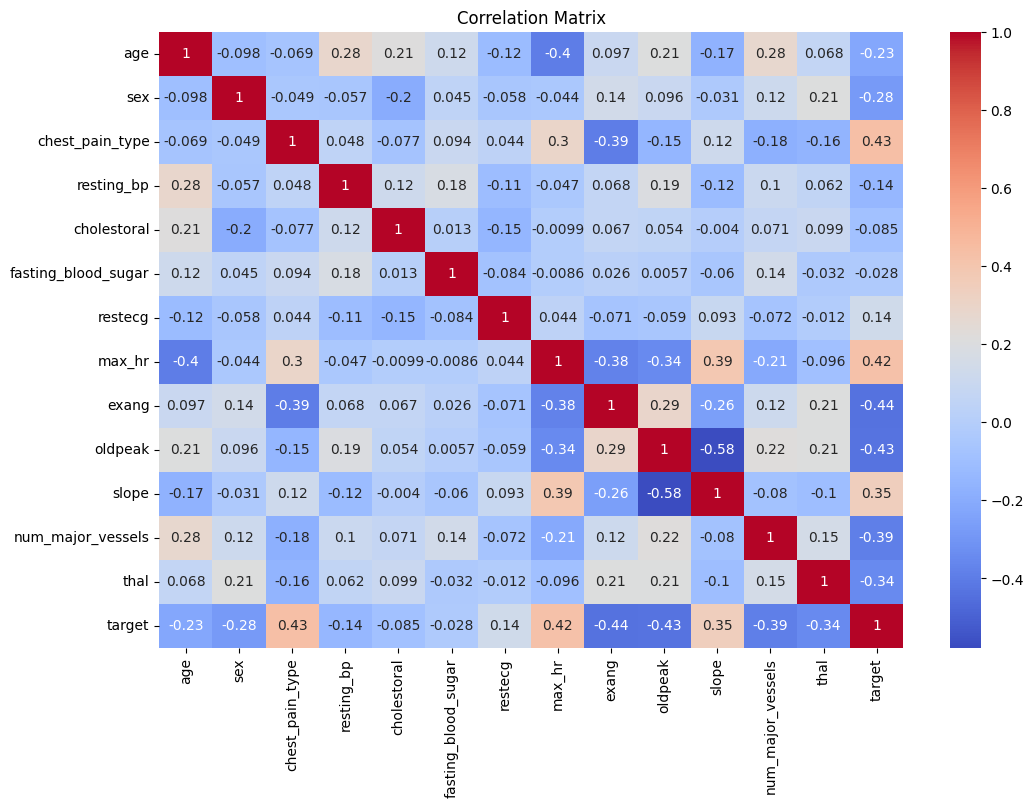

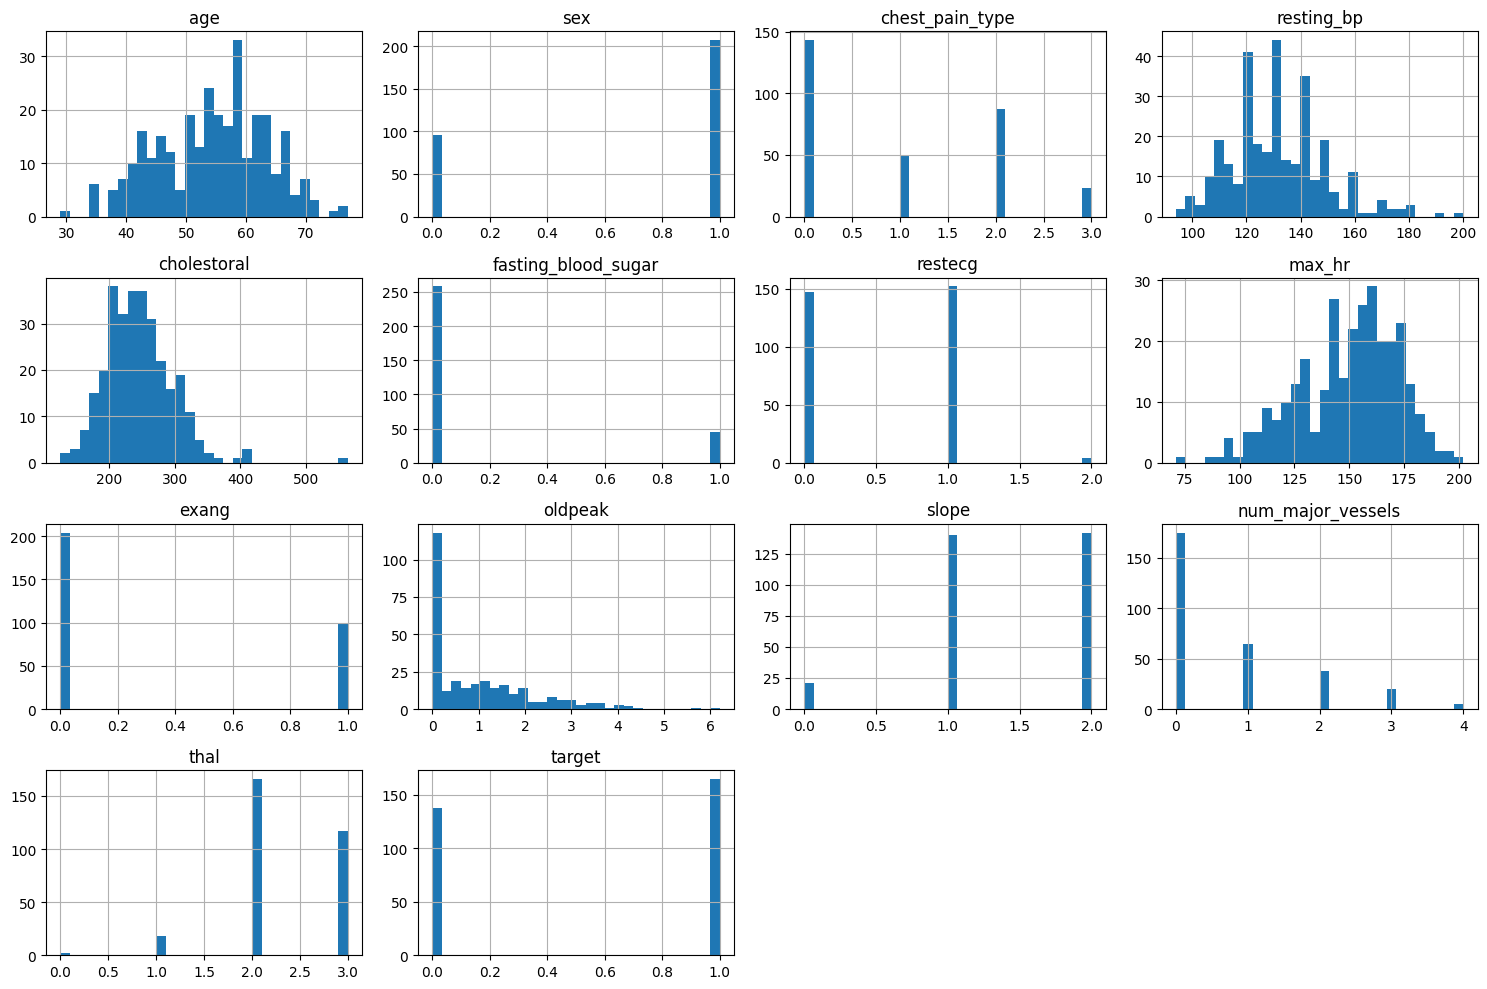

In [71]:
#Perform EDA to understand the data, check distributions, and detect outliers.
import seaborn as sns

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of Features
data.hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()


#### Find misclassifies samples to understand where the model struggles

In [72]:
#Identify and analyze misclassified samples to understand where the model struggles.
# Find misclassified samples
misclassified = X_test[y_test != y_pred]

# Analyze these samples
print("Misclassified Samples:")
print(misclassified)

# Combine predictions and actual values for analysis
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print(results_df[results_df['Actual'] != results_df['Predicted']])

# Explore their feature values
print(X_test.loc[y_test != y_pred])


Misclassified Samples:
     age  sex  chest_pain_type  resting_bp  cholestoral  fasting_blood_sugar  \
111   57    1                2         150          126                    1   
9     57    1                2         150          168                    0   
101   59    1                3         178          270                    0   
272   67    1                0         120          237                    0   
139   64    1                0         128          263                    0   
42    45    1                0         104          208                    0   
17    66    0                3         150          226                    0   
76    51    1                2         125          245                    1   
24    40    1                3         140          199                    0   
116   41    1                2         130          214                    0   
7     44    1                1         120          263                    0   

     restecg  ma

#### KNeighborClassifier

In [73]:
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
#create range to be test for n_neighbours
nneighbors = range(1,30)
#KNN Instance
KNN = KNeighborsClassifier()
#Loop through the range
for i in nneighbors:
    KNN.set_params(n_neighbors=i)
    #Run the fit for ith value
    KNN.fit(X_train,y_train)
    #Update the train scores
    train_scores.append(KNN.score(X_train,y_train))
    #Update the test scores list
    test_scores.append(KNN.score(X_test,y_test))
    
KNN.fit(X_train,y_train)



KNeighborsClassifier(n_neighbors=29)

In [74]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361]

### Plot the accuracy

Max KNN score: 75.41%


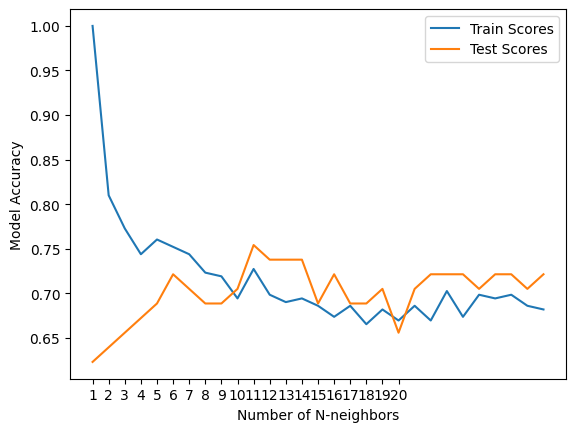

In [75]:
plt.plot(nneighbors, train_scores, label="Train Scores")
plt.plot(nneighbors, test_scores, label="Test Scores")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of N-neighbors")
plt.ylabel("Model Accuracy")
plt.legend()
print(f"Max KNN score: {max(test_scores)*100:.2f}%")


## Evaluation Report

#### Random Forest classification Report
#### Accuracy Score:                 0.819672131147541
#### Precision Score:                0.8387096774193549
#### Recall Score:                   0.8125
#### f1 Score:                       0.8253968253968254

#### (By Using Grid Search)......  Best Cross-Validation Score: 0.8141

#### Max KNN score : 75.41%

#### After Hyper parameter tuning the accuracy score is 0.8524590163934426